# Método de Primera Derivada
## Búsqueda de raíces de f'(x) = 0 para encontrar puntos críticos

In [1]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Celda 2: Función objetivo
f = lambda x: x**4 - 4*x**3 + 3*x**2 + 5
# Función ejemplo: x⁴ - 4x³ + 3x² + 5. Buscamos mínimo local en [0, 4].

In [3]:
# Celda 3: Implementación del método de primera derivada
def metodo_primera_derivada(f, a, b, tol=1e-6, max_iter=100):
    h = 1e-8
    df = lambda x: (f(x+h) - f(x-h)) / (2*h)
    x_n = (a + b) / 2  # Punto inicial
    iteraciones, x_vals, fx_vals, errores = [], [], [], []
    
    for i in range(max_iter):
        x_prev = x_n
        dfx = df(x_n)
        if abs(dfx) < tol: break
        step = 0.1  # Tamaño de paso fijo para simplicidad
        x_n = x_n - step * dfx
        x_n = np.clip(x_n, a, b)  # Mantener en intervalo
        error = abs(x_n - x_prev)
        iteraciones.append(i + 1)
        x_vals.append(x_n)
        fx_vals.append(f(x_n))
        errores.append(error)
        if error < tol: break
    
    tabla = pd.DataFrame({'Iteración': iteraciones, 'x_n': x_vals, 'f(x_n)': fx_vals, 'Error_abs': errores})
    return x_n, tabla, x_vals

In [4]:
# Celda 4: Ejecución con caso por defecto
x_opt, tabla, historial = metodo_primera_derivada(f, 0, 4)

print("Óptimo encontrado:", x_opt)
print(tabla.round(6))

Óptimo encontrado: 2.3660257075210893
    Iteración       x_n    f(x_n)  Error_abs
0           1  2.400000  0.161600   0.400000
1           2  2.342400  0.156427   0.057600
2           3  2.380218  0.153590   0.037818
3           4  2.356622  0.152644   0.023596
4           5  2.371892  0.152207   0.015270
5           6  2.362219  0.152042   0.009673
6           7  2.368435  0.151971   0.006216
7           8  2.364476  0.151943   0.003959
8           9  2.367012  0.151932   0.002536
9          10  2.365393  0.151927   0.001619
10         11  2.366429  0.151925   0.001036
11         12  2.365767  0.151924   0.000662
12         13  2.366190  0.151924   0.000423
13         14  2.365920  0.151924   0.000270
14         15  2.366093  0.151924   0.000173
15         16  2.365982  0.151924   0.000111
16         17  2.366053  0.151924   0.000071
17         18  2.366008  0.151924   0.000045
18         19  2.366037  0.151924   0.000029
19         20  2.366018  0.151924   0.000018
20         21  2.

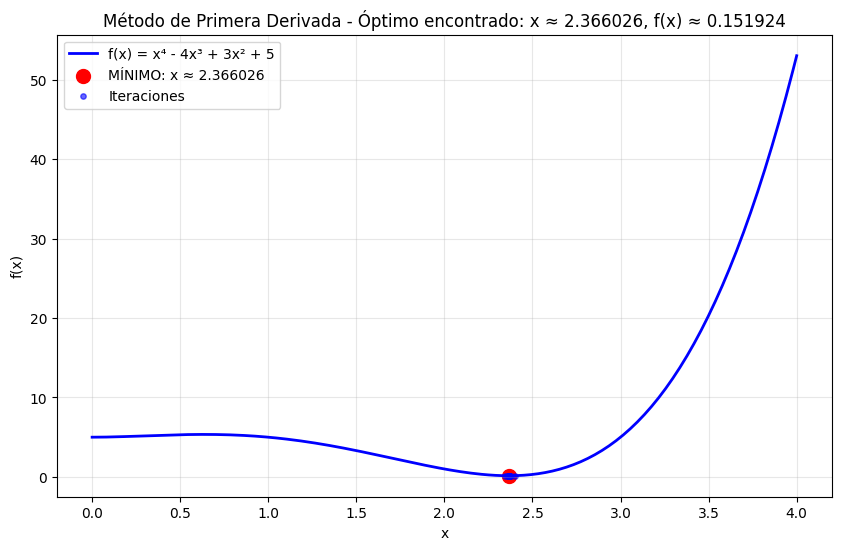

In [5]:
# Celda 5: Gráfica de convergencia
x = np.linspace(0, 4, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x⁴ - 4x³ + 3x² + 5')
plt.scatter(x_opt, f(x_opt), color='red', s=100, label=f'MÍNIMO: x ≈ {x_opt:.6f}')
plt.scatter(historial, [f(xi) for xi in historial], color='blue', s=15, alpha=0.6, label='Iteraciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Primera Derivada - Óptimo encontrado: x ≈ {x_opt:.6f}, f(x) ≈ {f(x_opt):.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Celda 6: Interfaz interactiva simple
print("=== Método de Primera Derivada Interactivo ===")

# Función del usuario
f_str = input("Ingrese f(x) (dejar vacío para usar por defecto): ").strip()
if f_str:
    try:
        f_user = lambda x: eval(f_str)
        f_user(2)  # Validar
        f = f_user
        print(f"Usando función: {f_str}")
    except:
        print("Error: función no válida. Usando caso por defecto.")

# Intervalo del usuario
interval_str = input("Ingrese [a,b] (ej. 0,4) o dejar vacío: ").strip()
a, b = 0, 4
if interval_str:
    try:
        vals = [float(x.strip()) for x in interval_str.split(',')]
        if len(vals) == 2:
            a, b = vals
    except:
        print("Intervalo inválido, usando [0,4]")

# Ejecutar método
try:
    x_opt_user, tabla_user, _ = metodo_primera_derivada(f, a, b)
    print(f"\nÓptimo encontrado: x = {x_opt_user:.6f}")
    print(tabla_user.tail().round(6))
except Exception as e:
    print(f"Error: {e}")

=== Método de Primera Derivada Interactivo ===

Óptimo encontrado: x = 2.366026
    Iteración       x_n    f(x_n)  Error_abs
22         23  2.366027  0.151924   0.000005
23         24  2.366024  0.151924   0.000003
24         25  2.366026  0.151924   0.000002
25         26  2.366025  0.151924   0.000001
26         27  2.366026  0.151924   0.000001
